In [1]:
#import the pandas library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the data
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data preparation

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

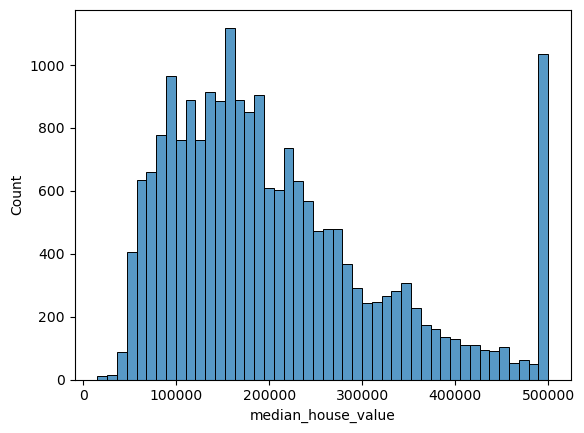

In [4]:
#plot the mean house value
sns.histplot(df.median_house_value)

In [5]:
# perform log1p on mean house value
price_logs = np.log1p(df.median_house_value)
price_logs 

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

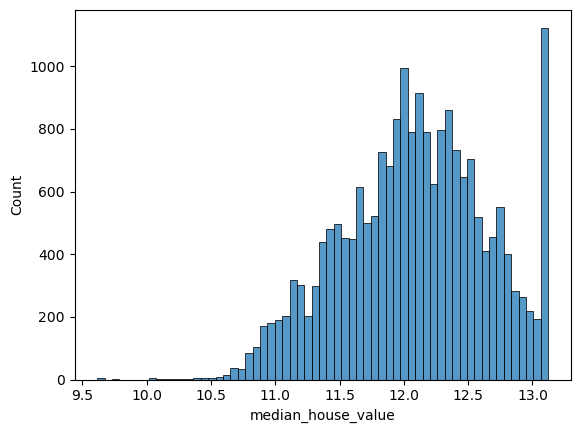

In [6]:
sns.histplot(price_logs)

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# select the variables needed from the ocean proximity column
allowed_values = ['INLAND','<1H OCEAN']


In [10]:
# SELECT ONLY DATA WHERE OCEAN PRPXIMITY IS EITHER INLAND OR <1H OCEAN
df_real = df[df['ocean_proximity'].isin(allowed_values)]
df_real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
df_real.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
# select the columns needed
numerical = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'
]

In [13]:
# filter the data
df_filtered = df_real[numerical]

In [14]:
df_filtered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [15]:
# check fo missing values
df_filtered.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [16]:
for col in df_filtered.columns:
    print(col)
    print(df_filtered[col].unique()[:5])
    print(df_filtered[col].nunique())
    print()

longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
818

latitude
[37.64 37.61 37.57 37.58 37.49]
834

housing_median_age
[32.  9. 21. 15. 20.]
52

total_rooms
[1283. 3666. 4342. 3575. 4126.]
5428

total_bedrooms
[ 194.  711.  783.  597. 1031.]
1822

population
[ 485. 2341. 2172. 1777. 2079.]
3683

households
[171. 703. 789. 559. 975.]
1707

median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
10434

median_house_value
[431000. 217000. 247600. 283500. 216900.]
3493



In [17]:
df_filtered.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Setting up validation frame work

In [18]:
# slit the data into 60/20/20 format
n = len(df_filtered)
n_val = int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

In [19]:
n_train, n_val, n_test

(9413, 3137, 3137)

In [20]:
df_train =df_filtered.iloc[n_train:]
df_val =df_filtered.iloc[n_train:n_train+n_val]
df_test =df_filtered.iloc[n_train+n_val:]

In [21]:
idx = np.arange(n)

In [22]:
# set the seed to 42 then random shuffle
np.random.seed(42)
np.random.shuffle(idx)

In [23]:
# apply to the train, validatin and test data
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

In [24]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [25]:
# reset the  index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
# take the y_tran, y_val and y_test as the median_house_value
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [27]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [28]:
df_train.iloc[20]

longitude             -118.010
latitude                33.880
housing_median_age      19.000
total_rooms           1434.000
total_bedrooms         391.000
population            1088.000
households             341.000
median_income            3.369
Name: 20, dtype: float64

In [29]:
xi = [1434, 1088, 391]

In [30]:
w0=7.17
w = [0.01, 0.04, 0.002]

In [31]:
def linear_regression (xi):
    n = len(xi)
    
    pred = w0
    
    for j in range (n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [32]:
linear_regression(xi)

65.812

In [33]:
np.expm1(65.812)

3.8175826041727333e+28

In [34]:
np.log1p(3.8175826041727333e+28)

65.812

# Linear Regression Vector Form 

In [35]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res +xi[j] * w[j]
        
    return res

In [36]:
def linear_regression (xi):
    return w0 +dot(xi,w)

In [37]:
w_new = [w0] + w

In [38]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [39]:
def linear_regression (xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [40]:
linear_regression(xi)

65.812

# Trainin Linear Regression Model

In [41]:
def train_linear_regression(X,y):
    pass

In [42]:
X= [
    [219, 91, 133],
    [10, 31, 23],
    [19, 391, 33],
    [15, 39, 53],
    [20, 250, 79],
    [35, 400, 37],
    [13, 270, 60],
    [25, 500, 28],
    [453, 31, 86]
]
X = np.array(X)
X

array([[219,  91, 133],
       [ 10,  31,  23],
       [ 19, 391,  33],
       [ 15,  39,  53],
       [ 20, 250,  79],
       [ 35, 400,  37],
       [ 13, 270,  60],
       [ 25, 500,  28],
       [453,  31,  86]])

In [43]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
X = np.column_stack([ones,X])

In [45]:
y = [10000, 20000, 15000, 25000,10000, 20000, 15000, 25000, 18000]

In [46]:
# transpose matrix
XTX = X.T.dot(X)
XTX 

array([[9.00000e+00, 8.09000e+02, 2.00300e+03, 5.32000e+02],
       [8.09000e+02, 2.56275e+05, 7.73060e+04, 7.40920e+04],
       [2.00300e+03, 7.73060e+04, 7.10005e+05, 9.52020e+04],
       [5.32000e+02, 7.40920e+04, 9.52020e+04, 4.15060e+04]])

In [47]:
# inverse of the matrics
XTX_inv = np.linalg.inv(XTX)
XTX_inv 

array([[ 1.07015304e+00, -6.85271731e-05, -1.71673379e-03,
        -9.65661860e-03],
       [-6.85271731e-05,  9.38890518e-06,  1.87822437e-06,
        -2.01897803e-05],
       [-1.71673379e-03,  1.87822437e-06,  5.12117378e-06,
         6.90490501e-06],
       [-9.65661860e-03, -2.01897803e-05,  6.90490501e-06,
         1.68068750e-04]])

In [48]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.63998319e+04,  1.07567740e+01, -5.49232324e+00, -1.45299988e+02])

In [49]:
w0 = w_full[0]
w = w_full[1:]

In [50]:
w0,w

(26399.831873224222, array([  10.75677403,   -5.49232324, -145.29998798]))

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [52]:
X_train = df_train.values

In [53]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [54]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan, nan, nan, nan]))

In [55]:
X_train =df_train.fillna(df_train.mean())

In [56]:
w0, w =train_linear_regression(X_train, y_train)

In [57]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

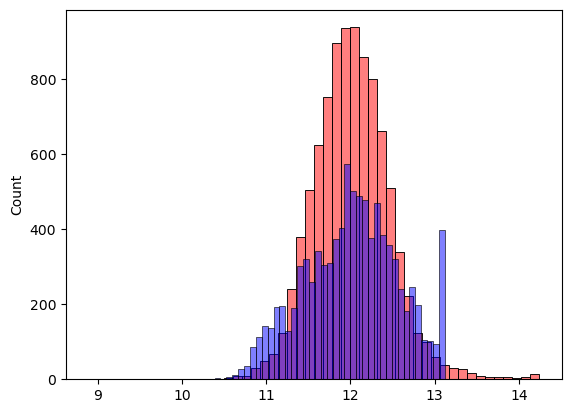

In [58]:
sns.histplot(y_pred, color ='red', alpha = 0.5, bins=50)
sns.histplot(y_train, color ='blue', alpha = 0.5, bins=50)

# RMSE

In [59]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [60]:
rmse(y_train, y_pred)

0.3400300822264257

In [61]:
# fill the missng values with 0 and traing the model with it
X_train =df_train.fillna(0).values

In [62]:
w0, w =train_linear_regression(X_train, y_train)

In [63]:
_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

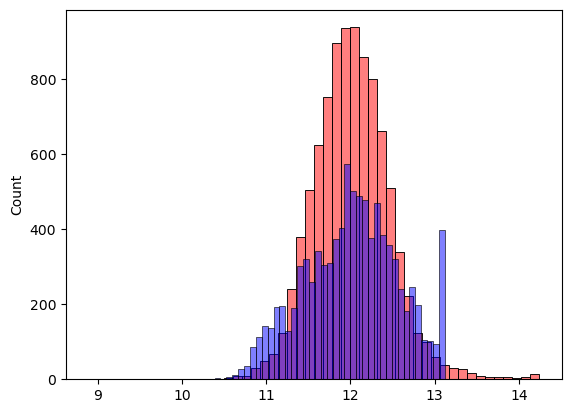

In [64]:
sns.histplot(y_pred, color ='red', alpha = 0.5, bins=50)
sns.histplot(y_train, color ='blue', alpha = 0.5, bins=50)

In [65]:
rmse(y_train, y_pred)

0.3400300822264257

# Validation Model

In [66]:
# validation
def prepare_X(df):
    df_num =  df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3408479034160764

# Regularization

In [68]:
# add very small numbers to the diagonal to control the weight
def train_linear_regression_reg(X, y, r = 0.001):
    ones =np.ones(X.shape[0])
    X =np.column_stack([ones,X])
    
    XTX= X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full =XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [69]:
X_train = prepare_X(df_train)
w0, w=train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34087793004788686

# Tuning the model

In [70]:
# use the best value fo r using the validatio dataset
for r in [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 12]:
    X_train = prepare_X(df_train)
    w0, w=train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    
    print(r, w0, score)

0.0 -9.76324947768302 0.3408479034160764
1e-06 -9.763228831204286 0.34084790617835264
1e-05 -9.763043013836052 0.3408479310540585
0.0001 -9.761185235221841 0.3408481800556784
0.001 -9.742646249411681 0.34085069218873115
0.01 -9.561056192893297 0.34087793004788686
0.1 -8.058889769327113 0.3412862042010568
1 -3.133154278426544 0.3448958327674733
10 -0.4381172315986164 0.34831498335174566
11 -0.3996712694318829 0.3483710855353136
12 -0.3673899850753791 0.34841836976873236


In [71]:
# set the seed to 0 then random shuffle
np.random.seed(0)
np.random.shuffle(idx)

In [191]:
# apply to the train, validatin and test data
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

In [192]:
# reset the  index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [193]:
# take the y_tran, y_val and y_test as the median_house_value
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [194]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [76]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3319040106816179

In [105]:
rmse_score=[0.3319040106816179]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [108]:
# set the seed to 1 then random shuffle
np.random.seed(1)
np.random.shuffle(idx)

In [113]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3427167659558032

In [114]:
rmse_score=[0.3427167659558032]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.34


In [141]:
# set the seed to 2 then random shuffle
np.random.seed(2)
np.random.shuffle(idx)

In [146]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3348341768036535

In [147]:
rmse_score=[0.3348341768036535]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [148]:
# set the seed to 3 then random shuffle
np.random.seed(3)
np.random.shuffle(idx)

In [153]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3304628543340303

In [154]:
rmse_score=[0.3304628543340303]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [155]:
# set the seed to 4 then random shuffle
np.random.seed(4)
np.random.shuffle(idx)

In [160]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.333394804185491

In [161]:
rmse_score=[0.333394804185491]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [162]:
# set the seed to 5 then random shuffle
np.random.seed(5)
np.random.shuffle(idx)

In [167]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.33374702479535484

In [168]:
rmse_score=[0.33374702479535484]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [169]:
# set the seed to 6 then random shuffle
np.random.seed(6)
np.random.shuffle(idx)

In [174]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.345678152865418

In [175]:
rmse_score=[0.345678152865418]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.35


In [176]:
# set the seed to 7 then random shuffle
np.random.seed(7)
np.random.shuffle(idx)

In [181]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.33146460551972207

In [182]:
rmse_score=[0.33146460551972207]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.33


In [183]:
# set the seed to 8 then random shuffle
np.random.seed(8)
np.random.shuffle(idx)

In [188]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.34551609541347783

In [189]:
rmse_score=[0.34551609541347783]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.35


In [190]:
# set the seed to 9 then random shuffle
np.random.seed(9)
np.random.shuffle(idx)

In [195]:
X_train = prepare_X(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred =w0 +X_val.dot(w)

rmse(y_val, y_pred)

0.3419005710514918

In [196]:
rmse_score=[0.3419005710514918]
rounded_rmse_score = [round(score,2)for score in rmse_score]
for score in rounded_rmse_score:
    print(score)

0.34


In [201]:
score_rm=[0.3319040106816179, 0.3427167659558032, 0.3348341768036535, 0.3304628543340303, 0.333394804185491,0.33374702479535484, 0.345678152865418,0.33146460551972207, 0.34551609541347783,0.3419005710514918]

In [202]:
score_rm

[0.3319040106816179,
 0.3427167659558032,
 0.3348341768036535,
 0.3304628543340303,
 0.333394804185491,
 0.33374702479535484,
 0.345678152865418,
 0.33146460551972207,
 0.34551609541347783,
 0.3419005710514918]

In [203]:
std_dev = np.std(score_rm)

In [204]:
print(round(std_dev,3))

0.006


In [205]:
df_full_train = pd.concat([df_train, df_val])

In [206]:
df_full_train =df_full_train.reset_index(drop=True)

In [207]:
X_full_train = prepare_X(df_full_train)

In [208]:
y_full_train = np.concatenate([y_train, y_val])

In [211]:
w0, w=train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [212]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score  

0.3367242277195725